# Overview
Most telecommmunication companies tend to be affected by churn. High churn which basically means many customers dont stick around very long tends to have affect these companies. Customer churn has several negative effects on telecom companies. These include reduced revenue, increased customer acquisition costs, and potential damage to brand reputation. Additionally, high churn rates can lead to a decrease in overall profitability and market share.
I will be using the Churn in Telecom's dataset from kaggle to be able to me up with classification model to be able to solve this problem.


# Business understanding 
Syria Tel Company tends to face this problems and it tends to reduce the amount of revenue lost due to churn.The aim is to predict patterns that tend to 
influence the customer behaviour so that they can handle churn and be able to able to build the brand reputation and increase profits being generated and 
overal market share.


# Objectives 
-  Use models to achieve better profitability
-  build a classifier to predict customer behaviour
-  Come up wuth recommendations to solve this kind of problem


# Data understanding

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
#load the dataset
df = pd.read_csv('SyrialTelChurn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#check on the overall structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Check on the summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Preparation 

In [5]:
# Drop irrelevant columns
df = df.drop(['state', 'area code', 'phone number'], axis=1)

In [6]:
# Encode binary categorical columns
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

# Convert churn column to binary integer (if not already)
df['churn'] = df['churn'].astype(int)

In [7]:
# check for duplicates 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [8]:
#check for nulls
df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# Define function for IQR-based outlier treatment
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column} - Outlier thresholds: {lower_bound:.2f} to {upper_bound:.2f}")
    
    # Cap the outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)   
    return data

# Applying to chosen columns
df = remove_outliers_iqr(df, 'customer service calls')
df = remove_outliers_iqr(df, 'total day charge')

customer service calls - Outlier thresholds: -0.50 to 3.50
total day charge - Outlier thresholds: 5.89 to 55.33


# Exploratory Data Analysis (EDA)

In [10]:
# Check correlation with target
correlations = df.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn                     1.000000
international plan        0.259852
total day minutes         0.205151
total day charge          0.204789
customer service calls    0.152404
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


# Different customer attributes in relation to churn

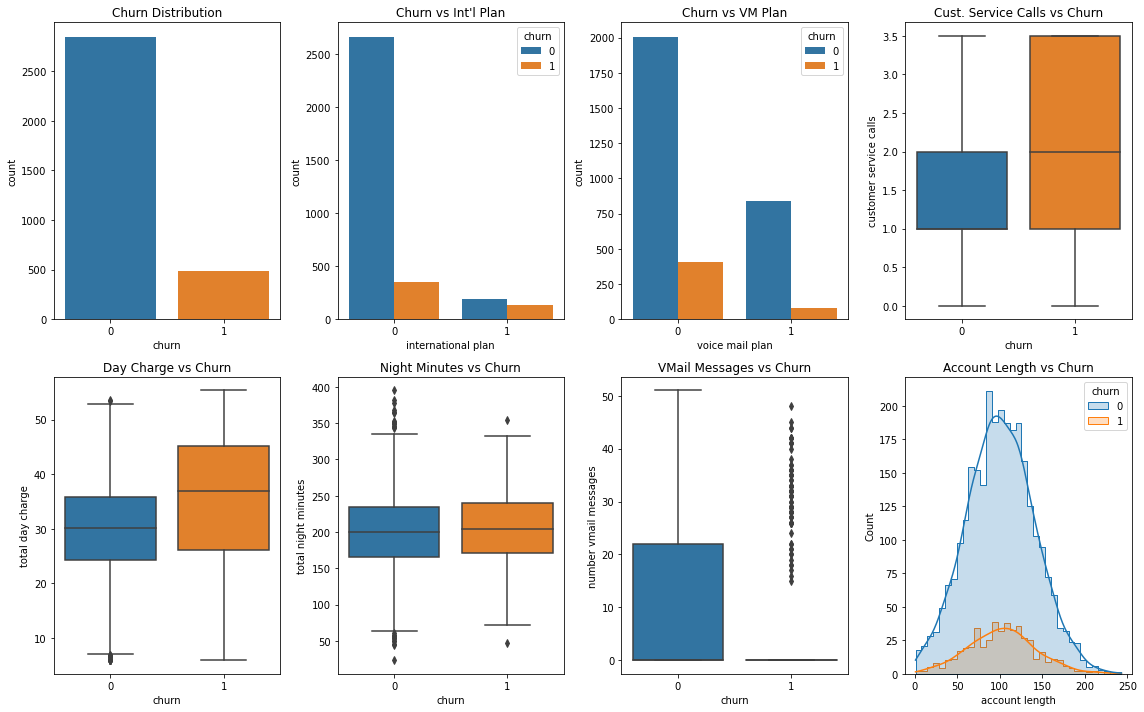

In [11]:
#set up the plots
plt.figure(figsize=(16,10))

plots = [
    {"type": "count", "x": "churn", "title": "Churn Distribution"},
    {"type": "count", "x": "international plan", "hue": "churn", "title": "Churn vs Int'l Plan"},
    {"type": "count", "x": "voice mail plan", "hue": "churn", "title": "Churn vs VM Plan"},
    {"type": "box", "x": "churn", "y": "customer service calls", "title": "Cust. Service Calls vs Churn"},
    {"type": "box", "x": "churn", "y": "total day charge", "title": "Day Charge vs Churn"},
    {"type": "box", "x": "churn", "y": "total night minutes", "title": "Night Minutes vs Churn"},
    {"type": "box", "x": "churn", "y": "number vmail messages", "title": "VMail Messages vs Churn"},
    {"type": "hist", "x": "account length", "hue": "churn", "title": "Account Length vs Churn"}
]

# Loop through and plot each subplot
for i, plot in enumerate(plots, 1):
    plt.subplot(2, 4, i)
    if plot["type"] == "count":
        sns.countplot(x=plot["x"], hue=plot.get("hue"), data=df)
    elif plot["type"] == "box":
        sns.boxplot(x=plot["x"], y=plot["y"], data=df)
    elif plot["type"] == "hist":
        sns.histplot(data=df, x=plot["x"], hue=plot.get("hue"), kde=True, element='step')
    plt.title(plot["title"])

plt.tight_layout()
plt.show()

-  Churn Distribution:Most customers did not churn.There's a class imbalance, which is important to handle when modeling.
-  Churn vs International Plan: Customers with an international plan are more likely to churn than those without. 
-  Churn vs Voice Mail Plan: Customers with a voice mail plan are less likely to churn, suggesting some retention effect.
-  Customer Service Calls vs Churn: Customers who made many service calls tend to churn more. Suggests dissatisfaction triggers churn.
-  Total Day Charge vs Churn: Higher daytime charges are associated with higher churn, possibly due to usage or cost concerns.
-  Total Night Minutes vs Churn: No strong visible pattern—churn appears consistent across night usage.
-  Number of Voice Mail Messages vs Churn: Customers who use voicemail less tend to churn more.
-  Account Length vs Churn: Churn occurs across various account lengths, indicating tenure alone doesn’t predict churn.
- The Customer Service Calls vs Churn boxplot shows that churned customers tend to make more customer service calls, which may indicate unresolved issues or poor customer experience—an important signal for churn prediction.

Some features like international plan, customer service calls, and day charge show clear separation between churners and non-churners. These are likely to be strong predictors and should be included in the model. Features showing weak or no patterns (like night minutes or account length) may have lower predictive power.


# Impact of Customer Usage and Service Calls on Churn

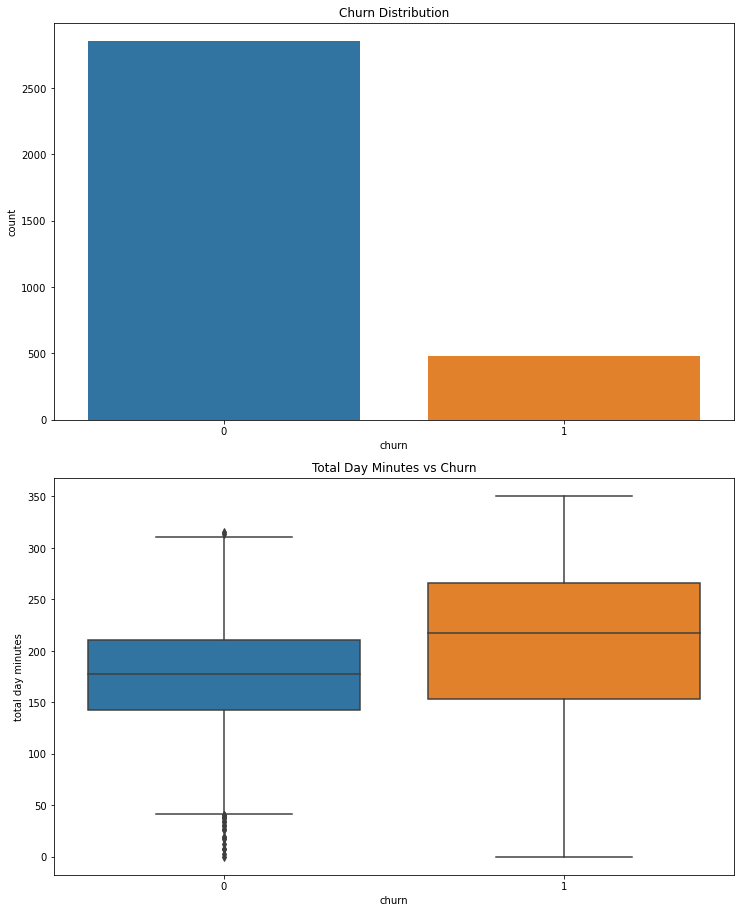

In [12]:
# Set up plots
plt.figure(figsize=(20,25))

#  Churn distribution
plt.subplot(4,2,1)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')

#  Numerical features vs churn - Total day minutes
plt.subplot(4,2,3)
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes vs Churn')


plt.tight_layout()
plt.show()


This set of plots provides valuable insights into customer churn behavior:

The Churn Distribution plot shows that the dataset is imbalanced, with significantly more customers not churning (churn = 0) than those who do (churn = 1). This is important to consider when building a model, as it may affect performance and require techniques like class weighting or resampling.

The Total Day Minutes vs Churn boxplot indicates that customers who churn tend to use more daytime minutes, suggesting high usage may correlate with dissatisfaction or higher bills, leading to churn.


These insights suggest that both usage behavior and customer interaction are key indicators of churn risk.

## Visualization based on correlation and Mutual Information

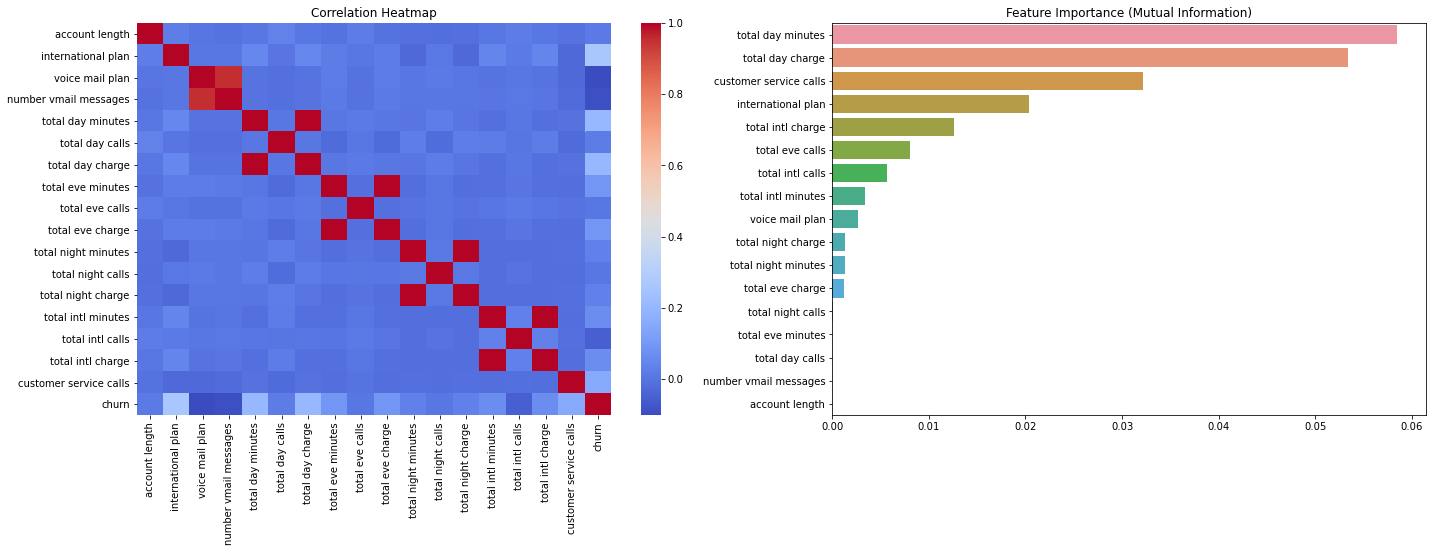

In [13]:
# Set up plots
plt.figure(figsize=(20, 25))
# 7. Correlation heatmap
plt.subplot(4, 2, 7)
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 8. Feature importance using mutual info
plt.subplot(4, 2, 8)
X = df.drop(columns=['churn'])
y = df['churn']
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
sns.barplot(x=mi_series, y=mi_series.index)
plt.title('Feature Importance (Mutual Information)')

plt.tight_layout()
plt.show()

## Correlation Heatmap
Shows linear relationships between numerical features.
Helps identify: Features positively/negatively correlated with churn, Multicollinearity (features strongly correlated with each other), Useful for detecting redundancy
### Mutual Information (MI) Plot 
Measures non-linear associations between features and churn. Higher MI = more predictive power. Works well with categorical features (like international plan).Helps rank features by importance for churn prediction. The goal is to Identify which features are useful for predicting churn. Exclude irrelevant or redundant features.
### Features Likely to predict perfecly
Based on correlation & MI:international plan, voice mail plan, customer service calls, total day charge or total day minutes, total intl calls, number vmail messages
###  Features Likely not to perform well
Due to low predictive value or redundancy: account length (low MI), total night charge / minutes (low variance across churn)

# Modeling 

To check on model performance i will do a logistic regression as the baseline model

In [14]:
X = df.drop(columns=['churn'])  # Drop the target column to create the feature matrix
y = df['churn']                 # Set the target variable

In [15]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()


# Step 3: Automatically identify numerical columns to scale (excluding object/bool types)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 4: Initialize the scaler
scaler = StandardScaler()

# Step 5: Fit the scaler on the training data
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Step 6: Apply the same transformation to the test data
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [17]:
#checking of imbalance 
class_distribution = df.iloc[:,-1].value_counts()
class_distribution

0    2850
1     483
Name: churn, dtype: int64

# Logistic regression

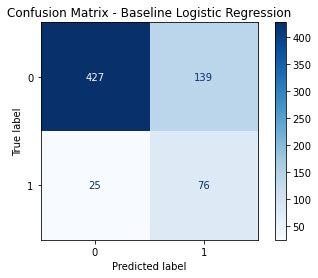

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       566
           1       0.35      0.75      0.48       101

    accuracy                           0.75       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.75      0.78       667

Accuracy: 0.7541229385307346
ROC AUC Score: 0.8142952104397719


In [18]:
# Baseline Logistic Regression 
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Confusion matrix
confmat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=model.classes_)
display.plot(cmap='Blues')
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

## Confusion matrix for logistic regression

True Positives (TP): Customers who actually churned(76) and were correctly predicted to churn.

True Negatives (TN): Customers who stayed(427) and were correctly predicted not to churn.

False Positives (FP): Customers who were predicted to churn(139) but actually stayed 

False Negatives (FN): Customers who actually churned(25) but were missed by the model

# Model performance

- Overall Accuracy: 75% — Not bad, but doesn't say much due to imbalance.

- ROC AUC Score: 0.81 — Solid, indicating the model separates classes well overall.

- Churn Precision is low (0.35) — Meaning: of all the customers predicted to churn, only 35% actually do.

- Churn Recall is decent (0.75) —  75% are -actual churners — which is typically more important in churn prediction.

# Decision trees

In [19]:
# Initialize the Decision Tree model with class_weight for imbalance handling
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate performance
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score (Decision Tree):", roc_auc_score(y_test, y_proba_dt))

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.80      0.74      0.77       101

    accuracy                           0.93       667
   macro avg       0.88      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

Accuracy (Decision Tree): 0.9325337331334332
ROC AUC Score (Decision Tree): 0.8545026764160515


# Random forest

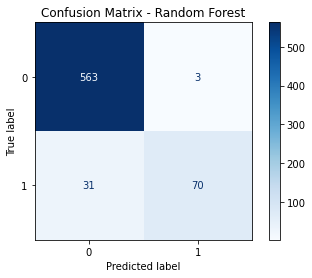

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.96      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667

Accuracy (Random Forest): 0.9490254872563718
ROC AUC Score (Random Forest): 0.931025434698947


In [20]:
# Initialize the Random forest model with class_weight for imbalance handling
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# train the model
rf_model.fit(X_train_scaled, y_train)

#make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Performance evaluation
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score (Random Forest):", roc_auc_score(y_test, y_proba_rf))

## Confusion matrix for Random forest
True Positives (TP): Customers who actually churned(70) and were correctly predicted to churn.

True Negatives (TN): Customers who stayed(563) and were correctly predicted not to churn.

False Positives (FP): Customers who were predicted to churn(3) but actually stayed — could lead to unnecessary retention efforts.

False Negatives (FN): Customers who actually churned(31) but were missed by the model 

- Maximize TP and TN, minimize FP and FN.

- Reducing FN (missing real churners) is often a higher priority.

## Model performance
- Overall Accuracy: 95% - The model correctly predicts churn for nearly 95% of customers. Accuracy alone can be misleading in imbalanced datasets. Deeper class-specific metrics will give more insights

- ROC AUC Score: 0.93 — Indicates excellent overall classification ability. 
- Churn Precision (0.96) —  When the model predicts a churner, it is usually correct.
- churn Recall: 0.69 → It misses about 31% of actual churners.


Random forest is the better classification model basing on the precision, f1_score and the ROC AUC score. This then prompts to ploting for feature importance to help draw better conclusions.

# Display feature importance in accordance to Random forest

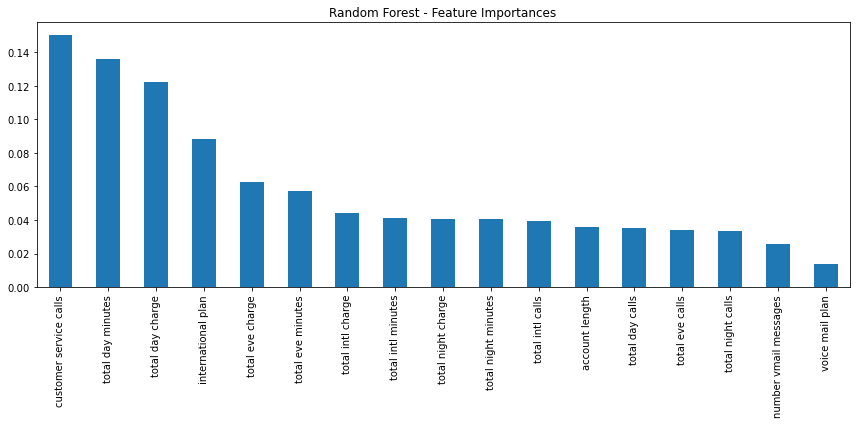

In [21]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
#sort
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
#plot
plt.title('Random Forest - Feature Importances')
plt.tight_layout()
plt.show()

# ROC curve for both Linear and Random Forest

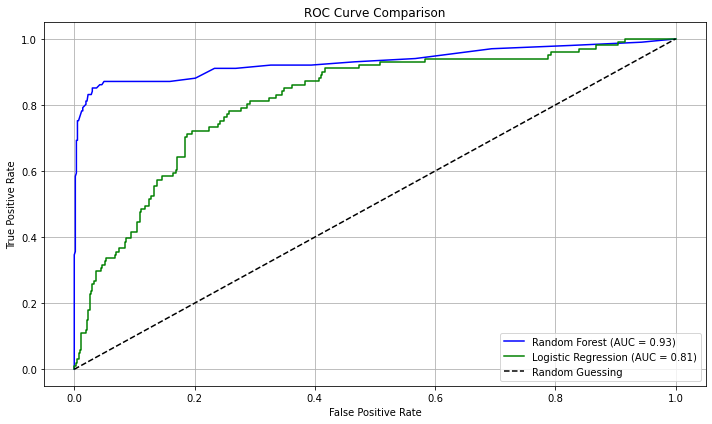

In [22]:
# Compute ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Diagonal line

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Model comparison ( Logistic and Random Forest)

-  Random Forest is the stronger overall model - Higher accuracy, ROC AUC, precision, and F1-score. It is also much better at correctly classifying non-churners (class 0) and making precise churn predictions.
It is also shown to be the better model from the ROC curve. The random forest curve is more to the left(closer to the y axis) thus depicting a better model.

- Logistic Regression sacrifices precision for recall - Catches more churners (higher recall) but wrongly flags many loyal customers (low precision).Lower accuracy and overall discrimination (AUC).

- Logistic Regression may trigger unnecessary actions - With 35% precision, 65% of predicted churners are actually loyal — leading to wasted retention costs.

- Random Forest offers a better balance - It still catches a large portion of churners (69% recall) but with very high confidence (96% precision). More reliable for making data-driven business decisions.

# Conclusions
Basing the Random forest predictions, the most important features that can be used to predict customer churn are customer service calls, total day charge, total day minutes and the international plan. 

The features that will not be quite reliable in predicting customer churn are total evening calls, number of voice mail messages and the voce mail plan.

# Recommendations 

### Recommendations to solve churn
- Customer service calls is the most important churn driver.  
Reduce repeat or unresolved issues by: Improving agent training, Offering callbacks or quicker resolution paths, Monitoring NPS after support calls

### Review International Plan Pricing
- Customers with international plans are significantly more likely to churn. Re-evaluate pricing or improve value (e.g., bundle with discounts or extra minutes).

### Engage High Usage Customers
- Customers with high daytime usage or charges are more likely to churn. These may be valuable but frustrated users—consider: Usage-based loyalty perks, Targeted feedback surveys, Personalized billing review sessions

### Launch a Churn Prevention Campaign
- Focus on customers who: Have an international plan, Had high daytime charges.
- These customers are your top churn risk—prioritize them in retention.

### Adopt Random Forest for Churn Prediction

Random Forest showed the best performance in accuracy (95%), precision (96%), and AUC (0.93).

It provides reliable predictions with fewer false positives, helping target actual churners and reducing wasted retention spending.

###  Prioritize Targeted Retention
Focus retention resources (discounts, offers, loyalty programs) on customers with high churn probability and valuable usage patterns (e.g., high day charges).

Avoid blanket offers—use model predictions to retain only likely churners.